In [5]:
import pandas as pd
import os
import arxiv

import urllib
from sklearn.metrics.pairwise import cosine_similarity
import fitz
import tensorflow_hub as hub
import numpy as np 

In [6]:
from function import *

In [7]:
import time
import matplotlib as plt

In [8]:
import sys
import os

In [9]:
#use tranfer learning
#takes longer to load than dan
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

# Get abstract from Anthology and Arxiv

In [10]:
table = pd.read_csv('combined_table.csv',index_col='Unnamed: 0')

C:\Users\20193635\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)



In [11]:
table.head()

,ISBN,address,booktitle,doi,journal,language,month,note,number,pages,publisher,title,url,volume,year,clean,title_Arxiv,pdf_url_Arxiv,published_Arxiv,result_Arxiv
0,NaN,Online,NaN,NaN,NaN,NaN,August,NaN,NaN,NaN,Association for Computational Linguistics,Proceedings of the 5th Workshop on Online Abus...,https://aclanthology.org/2021.woah-1.0,NaN,2021,Proceedings of the 5th Workshop on Online Abus...,NF,NaN,NaN,NaN
1,NaN,Online,Proceedings of the 5th Workshop on Online Abus...,10.18653/v1/2021.woah-1.1,NaN,NaN,August,NaN,NaN,1--5,Association for Computational Linguistics,Exploiting Auxiliary Data for Offensive Langua...,https://aclanthology.org/2021.woah-1.1,NaN,2021,Exploiting Auxiliary Data for Offensive Langua...,NF,NaN,NaN,NaN
2,NaN,Online,Proceedings of the 5th Workshop on Online Abus...,10.18653/v1/2021.woah-1.2,NaN,NaN,August,NaN,NaN,6--16,Association for Computational Linguistics,Modeling Profanity and Hate Speech in Social M...,https://aclanthology.org/2021.woah-1.2,NaN,2021,Modeling Profanity and Hate Speech in Social M...,Modeling Profanity and Hate Speech in Social M...,http://arxiv.org/pdf/2106.07505v2,2021-06-14 15:34:37+00:00,http://arxiv.org/abs/2106.07505v2
3,NaN,Online,Proceedings of the 5th Workshop on Online Abus...,10.18653/v1/2021.woah-1.3,NaN,NaN,August,NaN,NaN,17--25,Association for Computational Linguistics,HateBERT: Retraining BERT for Abusive Language...,https://aclanthology.org/2021.woah-1.3,NaN,2021,HateBERT Retraining BERT for Abusive Language...,HateBERT: Retraining BERT for Abusive Language...,http://arxiv.org/pdf/2010.12472v2,2020-10-23 15:14:14+00:00,http://arxiv.org/abs/2010.12472v2
4,NaN,Online,Proceedings of the 5th Workshop on Online Abus...,10.18653/v1/2021.woah-1.4,NaN,NaN,August,NaN,NaN,26--35,Association for Computational Linguistics,Memes in the Wild: Assessing the Generalizabil...,https://aclanthology.org/2021.woah-1.4,NaN,2021,Memes in the Wild Assessing the Generalizabil...,Memes in the Wild: Assessing the Generalizabil...,http://arxiv.org/pdf/2107.04313v1,2021-07-09 09:04:05+00:00,http://arxiv.org/abs/2107.04313v1


In [12]:
def search_abstract(ids):
    search = arxiv.Search(id_list = [ids],max_results=1)
    for result in search.results():
        a = result.summary
        time.sleep(3)
        return a

In [13]:
def get_id(s):
    """
    Start functions for pdf to text
    Get only first version instead of another from arxiv.
    use apply function on the column to be changed."""
    return s.split('/')[-1]

In [14]:
# tab

In [15]:
abstract = pd.read_csv('abs_table.csv')

In [16]:
abstract.head(2)

,abstract,url
0,We advance the state-of-the-art in unsupervise...,https://aclanthology.org/2022.wit-1.1
1,With millions of documented recoveries from CO...,https://aclanthology.org/2022.wit-1.2


In [17]:
table = table.dropna(subset= ['result_Arxiv'])
table.head(2)

,ISBN,address,booktitle,doi,journal,language,month,note,number,pages,publisher,title,url,volume,year,clean,title_Arxiv,pdf_url_Arxiv,published_Arxiv,result_Arxiv
2,NaN,Online,Proceedings of the 5th Workshop on Online Abus...,10.18653/v1/2021.woah-1.2,NaN,NaN,August,NaN,NaN,6--16,Association for Computational Linguistics,Modeling Profanity and Hate Speech in Social M...,https://aclanthology.org/2021.woah-1.2,NaN,2021,Modeling Profanity and Hate Speech in Social M...,Modeling Profanity and Hate Speech in Social M...,http://arxiv.org/pdf/2106.07505v2,2021-06-14 15:34:37+00:00,http://arxiv.org/abs/2106.07505v2
3,NaN,Online,Proceedings of the 5th Workshop on Online Abus...,10.18653/v1/2021.woah-1.3,NaN,NaN,August,NaN,NaN,17--25,Association for Computational Linguistics,HateBERT: Retraining BERT for Abusive Language...,https://aclanthology.org/2021.woah-1.3,NaN,2021,HateBERT Retraining BERT for Abusive Language...,HateBERT: Retraining BERT for Abusive Language...,http://arxiv.org/pdf/2010.12472v2,2020-10-23 15:14:14+00:00,http://arxiv.org/abs/2010.12472v2


In [18]:
table = table.merge(abstract, on='url')
table.head(2)

,ISBN,address,booktitle,doi,journal,language,month,note,number,pages,...,title,url,volume,year,clean,title_Arxiv,pdf_url_Arxiv,published_Arxiv,result_Arxiv,abstract
0,NaN,Online,Proceedings of the 5th Workshop on Online Abus...,10.18653/v1/2021.woah-1.2,NaN,NaN,August,NaN,NaN,6--16,...,Modeling Profanity and Hate Speech in Social M...,https://aclanthology.org/2021.woah-1.2,NaN,2021,Modeling Profanity and Hate Speech in Social M...,Modeling Profanity and Hate Speech in Social M...,http://arxiv.org/pdf/2106.07505v2,2021-06-14 15:34:37+00:00,http://arxiv.org/abs/2106.07505v2,Hate speech and profanity detection suffer fro...
1,NaN,Online,Proceedings of the 5th Workshop on Online Abus...,10.18653/v1/2021.woah-1.3,NaN,NaN,August,NaN,NaN,17--25,...,HateBERT: Retraining BERT for Abusive Language...,https://aclanthology.org/2021.woah-1.3,NaN,2021,HateBERT Retraining BERT for Abusive Language...,HateBERT: Retraining BERT for Abusive Language...,http://arxiv.org/pdf/2010.12472v2,2020-10-23 15:14:14+00:00,http://arxiv.org/abs/2010.12472v2,"We introduce HateBERT, a re-trained BERT model..."


## Two articles without abstract in bib file 
(also no abstract on site. It can be retrieved from the pdf)

In [22]:
table['abstract'].describe()

count                                                  7918
unique                                                 7918
top       Hate speech and profanity detection suffer fro...
freq                                                      1
Name: abstract, dtype: object

In [42]:
table[table['abstract'].isna()]

,ISBN,address,booktitle,doi,journal,language,month,note,number,pages,...,url,volume,year,clean,title_Arxiv,pdf_url_Arxiv,published_Arxiv,result_Arxiv,abstract,id_arxiv
995,NaN,"Punta Cana, Dominican Republic",Findings of the Association for Computational ...,10.18653/v1/2021.findings-emnlp.424,NaN,NaN,November,NaN,NaN,4929--4952,...,https://aclanthology.org/2021.findings-emnlp.424,NaN,2021,GeDi Generative Discriminator Guided Sequence...,GeDi: Generative Discriminator Guided Sequence...,http://arxiv.org/pdf/2009.06367v2,2020-09-14 17:45:36+00:00,http://arxiv.org/abs/2009.06367v2,NaN,2009.06367v1
4831,NaN,"Sydney, Australia",Proceedings of the The 17th Annual Workshop of...,NaN,NaN,NaN,4--6 December,NaN,NaN,28--34,...,https://aclanthology.org/U19-1004,NaN,2019,A neural joint model for Vietnamese word segme...,A neural joint model for Vietnamese word segme...,http://arxiv.org/pdf/1812.11459v3,2018-12-30 03:03:28+00:00,http://arxiv.org/abs/1812.11459v3,NaN,1812.11459v1


In [24]:
table['id_arxiv'] = table['result_Arxiv'].apply(only_first).apply(get_id)

In [43]:
table.columns

Index(['ISBN', 'address', 'booktitle', 'doi', 'journal', 'language', 'month',
       'note', 'number', 'pages', 'publisher', 'title', 'url', 'volume',
       'year', 'clean', 'title_Arxiv', 'pdf_url_Arxiv', 'published_Arxiv',
       'result_Arxiv', 'abstract', 'id_arxiv'],
      dtype='object')

In [44]:
table = table[['url','abstract', 'id_arxiv']]

In [53]:
table.head()

,url,abstract,id_arxiv
0,https://aclanthology.org/2021.woah-1.2,Hate speech and profanity detection suffer fro...,2106.07505v1
1,https://aclanthology.org/2021.woah-1.3,"We introduce HateBERT, a re-trained BERT model...",2010.12472v1
2,https://aclanthology.org/2021.woah-1.4,Hateful memes pose a unique challenge for curr...,2107.04313v1
3,https://aclanthology.org/2021.woah-1.5,Content moderation is often performed by a col...,2107.04212v1
4,https://aclanthology.org/2021.woah-1.10,Bias mitigation approaches reduce models{'} de...,2108.01721v1


In [41]:
len(table)

7920

In [54]:
# tab = table.head(5)
start = time.time()
table['abstract_Arxiv'] = table['id_arxiv'].apply(search_abstract).apply(clean_n)
end = time.time() 
print("Time taken:      {:.3f}s".format(end - start), file=sys.stderr)

Time taken:      27228.056s


In [55]:
table.to_csv('table_emergency_copy.csv')

In [68]:
table.isna().sum()

url               0
abstract          2
id_arxiv          0
abstract_Arxiv    0
dtype: int64

In [72]:
table.loc[995]['abstract'] = 'While large-scale language models (LMs) are able to imitate the distribution of natural language well enough to generate realistic text, it is difficult to control which regions of the distribution they generate. This is especially problematic because datasets used for training large LMs usually contain significant toxicity, hate, bias, and negativity. One promising approach to address this is to use discriminators to guide decoding from LMs, but existing methods for this are too slow to be useful in practice for many applications. We present GeDi as a significantly more efficient discriminator-based approach for guiding decoding. GeDi guides generation at each step by computing classification probabilities for all possible next tokens via Bayes rule by normalizing over two class-conditional distributions; one conditioned on the desired attribute,  or control code, and another conditioned on the undesired attribute, or anti control code. We find that GeDi gives controllability on par with or better than previous controllable generation methods. GeDi results in significantly faster generation speeds than the only previous method that achieved comparable controllability in our experiments. We also show that GeDi can make GPT-2 and GPT-3 significantly less toxic while maintaining linguistic fluency, without sacrificing significantly on generation speed. Lastly, we find training GeDi on only three topics allows us to controllably generate new topics zero-shot from just a keyword.'
table.loc[4831]['abstract'] = 'We propose the first multi-task learning model for joint Vietnamese word segmentation, part-of-speech (POS) tagging and dependency parsing. In particular, our model extends the BIST graph-based dependency parser (Kiperwasser and Goldberg, 2016) with BiLSTMCRF-based neural layers (Huang et al., 2015) for word segmentation and POS tagging. On Vietnamese benchmark datasets, experimental results show that our joint model obtains state-of-the-art or competitive performances.'



In [73]:
table.isna().sum()

url               0
abstract          0
id_arxiv          0
abstract_Arxiv    0
dtype: int64

In [74]:
table['cosine_abstract'] = table.apply(lambda x:cosine_similarity(embed([x.abstract]),embed([x.abstract_Arxiv])), axis=1)
table['cosine_abstract'] = table['cosine_abstract'].astype(float)

In [75]:
table_abstract = table[['url', 'cosine_abstract']]

In [76]:
table_abstract.to_csv('table_cosine_abstract.csv')


In [77]:
table_abstract.tail(2)

,url,cosine_abstract
7918,https://aclanthology.org/2016.amta-researchers.4,1.0
7919,https://aclanthology.org/2016.amta-researchers.10,1.0


In [78]:
table_abstract.describe()

,cosine_abstract
count,7920.000000
mean,0.978068
std,0.059433
min,0.407765
25%,0.989178
50%,0.999985
75%,1.000000
max,1.000000


<AxesSubplot:ylabel='Frequency'>

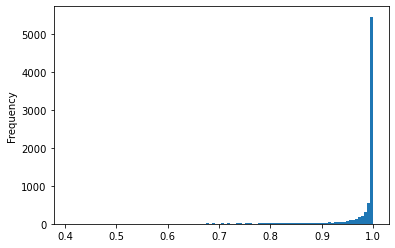

In [89]:
table['cosine_abstract'].plot(kind='hist', bins = 100)

<AxesSubplot:ylabel='Frequency'>

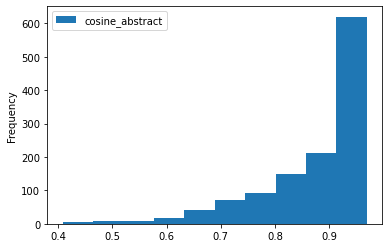

In [91]:
table[table['cosine_abstract']<0.97].plot(kind='hist')

In [92]:
table[table['cosine_abstract']<0.5]

,url,abstract,id_arxiv,abstract_Arxiv,cosine_abstract
271,https://aclanthology.org/2021.nuse-1.8,Automated storytelling has long captured the a...,2102.12634v1,The scope of this survey paper is to explore t...,0.487546
357,https://aclanthology.org/2021.naacl-main.27,We present a fast and scalable architecture ca...,2004.10663v1,"In task-oriented dialogue systems, Dialogue St...",0.443520
656,https://aclanthology.org/2021.mtsummit-up.27,Production NMT systems typically need to serve...,2102.10160v1,Many modern Neural Machine Translation (NMT) s...,0.439994
2192,https://aclanthology.org/2021.acl-long.357,"Event forecasting is a challenging, yet import...",2005.00792v1,Textual data are often accompanied by time inf...,0.471354
3545,https://aclanthology.org/2020.emnlp-main.577,Knowledge graphs (KGs) can vary greatly from o...,1904.09447v1,This work presents a joint solution to two cha...,0.469136
6555,https://aclanthology.org/P18-1141,We present a new method for estimating vector ...,1801.06807v1,Multilingual embeddings build on the success o...,0.459467
6831,https://aclanthology.org/D18-1018,Coreference resolution is an intermediate step...,1708.00160v1,We introduce an efficient algorithm for mining...,0.414184
7258,https://aclanthology.org/W17-5310,In this paper we present the model used by the...,1707.03103v1,In this paper we present the model used by the...,0.407765
7310,https://aclanthology.org/W17-3537,A generation system can only be as good as the...,1705.03802v1,"Recently, several data-sets associating data t...",0.491150


In [96]:
# similar example
table.loc[1]['abstract'],table.loc[1]['abstract_Arxiv']

('We introduce HateBERT, a re-trained BERT model for abusive language detection in English. The model was trained on RAL-E, a large-scale dataset of Reddit comments in English from communities banned for being offensive, abusive, or hateful that we have curated and made available to the public. We present the results of a detailed comparison between a general pre-trained language model and the retrained version on three English datasets for offensive, abusive language and hate speech detection tasks. In all datasets, HateBERT outperforms the corresponding general BERT model. We also discuss a battery of experiments comparing the portability of the fine-tuned models across the datasets, suggesting that portability is affected by compatibility of the annotated phenomena.',
 'In this paper, we introduce HateBERT, a re-trained BERT model for abusive language detection in English. The model was trained on RAL-E, a large-scale dataset of Reddit comments in English from communities banned for

In [ ]:
#different example
table.loc[1]['abstract'],table.loc[1]['abstract_Arxiv']